<IPython.core.display.Javascript object>


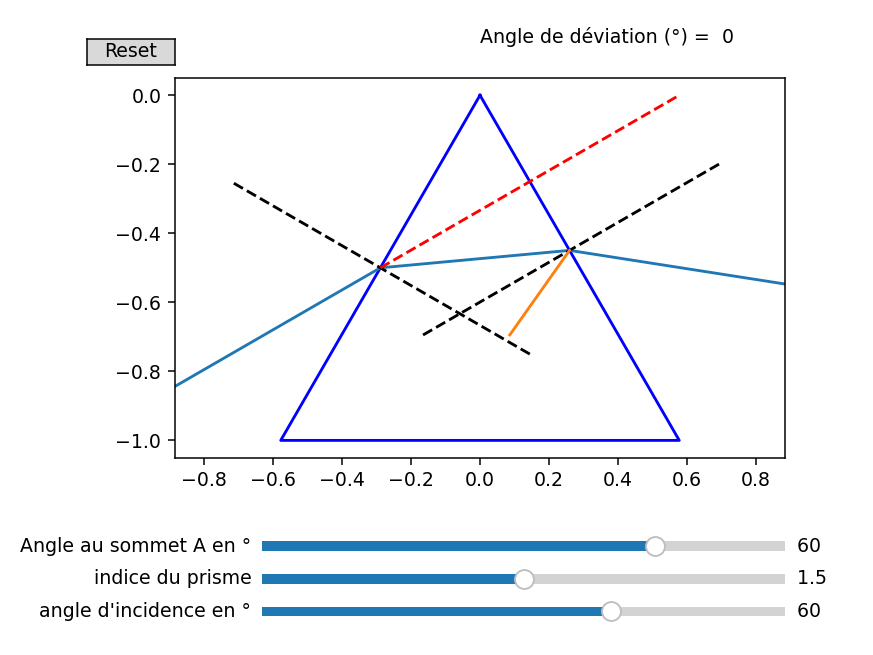

59.99999999999999 35.264389682754654 5.264389682754653 -24.735610317245342
Déviation -0.6785276322750242
[-1.1547005383792515, -0.28867513459481287, 0.2595130239938435, 1.247535535381038] [-1.0, -0.5, -0.4494897427831781, -0.6037995512599603] True


In [5]:

%matplotlib notebook
from matplotlib import pyplot as plt
#from matplotlib.patches import Polygon
#from defs_optique import dessine_rapporteur
from numpy import *
# ajout curseur et bouton
from matplotlib.widgets import Slider, Button

n = 1.5                     # indice de réfraction
A = 60*pi/180               # angle d'ouverture du prisme
alpha1 = 30*pi/180          # pente du rayon incident par rapport à l'horizontale en rad
p = tan(A/2)                # on aura besoin de cette grandeur plusieurs fois
theta1 = alpha1 + A/2       # angle d'incidence sur face d'entrée
D = 0                       # initialisation angle déviation

def rayon(n, A, theta1):
    # calcul des points P
    theta1prime = arcsin(sin(theta1)/n)  # angle de réfraction
    alpha2 = theta1prime - A/2           # pente du rayon intérieur
    theta2prime =   alpha2 - A/2         # angle d'incidence sur face 2
    normale2 = True                      # test tracé de la normale du rayon sortant
    alpha1 = theta1 -A/2                 # angle incidentce par rapport à l'horizontal
    p = tan(A/2)                         # on aura besoin de cette grandeur plusieurs fois

    y1 = -0.5                                    # point P2
    x1 = y1*p                                    # point P2
    x0, y0 = x1 - cos(alpha1), y1 - sin(alpha1)  # point P1
    x = [x0, x1]                                 # rayon P1P2
    y = [y0, y1]                                 # rayon P1P2
    x5 = x1 + cos(alpha1)                        # point P5 pour direction rayon incident et définir déviation
    y5 = y1 + sin(alpha1)                        # point P5 pour direction rayon incident et définir déviation

    if (alpha2<A/2-pi/2):        # si le rayon intérieur ne ressort pas
        x += [x[1] + cos(alpha2)]
        y += [y[1] + sin(alpha2)]
        normale2 = False
    else:                        # si le rayon intérieur ressort
        t2 = tan(alpha2)
        x += [(x[1] * t2-y[1])/(1/p+t2)]         # point P3
        y += [y[1] + (x[2]-x[1])*t2]             # point P3
        # mettre le rayon réfléchi en cas de réflexion totale
        x6 = x[2] - 0.3*cos(alpha2-2*theta2prime)  # point P6 pour rayon réfléchi à revoir !
        y6 = y[2] - 0.3*sin(alpha2-2*theta2prime)  # point P6 pour rayon réfléchi
        reftot.set_data([x[2], x6],[y[2], y6])

        if(abs(n*sin(theta2prime))<1):  # si pas de réflexion totale
            theta2 = arcsin(n*sin(theta2prime))
            alpha3 = theta2 + A/2
            x += [x[2] + cos(alpha3)]            # point P4
            y += [y[2] + sin(alpha3)]            # point P4
            normale2 = True
        else :
            normale2 = False


    # les angles
    print(theta1*180/pi, theta1prime*180/pi, alpha2*180/pi, theta2prime*180/pi)
    # angle de déviation
    if normale2 == True :
        D = alpha3 - alpha1
        print("Déviation", D)
    else :
        D = 0

    # les points P
    print(x, y, normale2)
    # affiche le rayon
    line.set_data(x, y)
    # afficher la normale entrante et sortante
    norm1.set_data([x[1]+0.5*cos(A/2),x[1]-0.5*cos(A/2)], [y[1]-0.5*sin(A/2), y[1]+0.5*sin(A/2)])
    norm2.set_data([x[2]+0.5*cos(A/2),x[2]-0.5*cos(A/2)], [y[2]+0.5*sin(A/2), y[2]-0.5*sin(A/2)])
    # afficher prisme
    prisme.set_data([0, -1*p, 1*p, 0],[0, -1, -1, 0])
    # prolongation du rayon incident
    prol.set_data([x1, x5],[y1, y5])
    plt.draw()
    return(x, y, normale2, D)

def update(val):
    n = s_indice.val
    A = (s_angleA.val)*pi/180
    theta1 = (s_angle.val)*pi/180
    print(n, A*180/pi, theta1*180/pi)
    (x, y, normale2, D) = rayon(n, A, theta1)
    dev.set_text(round(D,3))
    fig.canvas.draw_idle()

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.20, bottom=0.30)
ax.axis('equal')
# tracé du prisme en fonction de A à travers p=tan(A/2)
#ax.add_patch(Polygon(([0,0], [-1*p,-1], [1*p,-1]), closed=True, fill=True, color='lightgrey'))
prisme, = ax.plot([0, -1*p, 1*p, 0],[0, -1, -1, 0], c='b')
# définition du rayon et des normales entrante et sortante
line, = ax.plot([],[])
norm1, = ax.plot([],[], linestyle='dashed', c='k')
norm2, = ax.plot([],[], linestyle='dashed', c='k')
# prolongation rayon incident pour voir déviation
prol, = ax.plot([],[], linestyle='dashed', c='r')
# rayon réfléchi si réflexion totale
reftot, = ax.plot([],[])
# affichage de l'angle de déviation
plt.text(0, 0.15, "Angle de déviation (°) =")
dev = plt.text(0.7, 0.15, round(D,3))
# calcul du premier rayon
(x, y, normale2, D) = rayon(n, A, theta1)

# ajout curseur angle A angle d'incidence indice prisme
ax_angleA = plt.axes([0.3, 0.15, 0.6, 0.03])
s_angleA = Slider(ax_angleA, "Angle au sommet A en °", 30, 70, valinit=60)
ax_indice = plt.axes([0.3, 0.1, 0.6, 0.03])
s_indice = Slider(ax_indice, "indice du prisme", 1.2, 1.8, valinit=1.5)
ax_angle = plt.axes([0.3, 0.05, 0.6, 0.03])
s_angle = Slider(ax_angle, "angle d'incidence en °", 0, 90, valinit=theta1*180/pi)

# remise à l'initial des paramètres
resetax = plt.axes([0.1, 0.9, 0.1, 0.04])
button = Button(resetax, 'Reset')

def reset(event):
    s_indice.reset()
    s_angleA.reset()
    s_angle.reset()

button.on_clicked(reset)

s_indice.on_changed(update)
s_angleA.on_changed(update)
s_angle.on_changed(update)

plt.show()
